### EE 699 Next Generation Wireless Networks 
- Assignment 02 
- Author: $\text{Rishabh Pomaje}$ 
- Contact: 210020036@iitdh.ac.in

- In this notebook, we will simulate the following queues and compare our empirical findings with the analytic results.
- Scheduling discipline used : _First-In-First-Out_.

1. $M/M/1$ Assumptions :
    - Poisson arrival process.
    - Exponential service times.
    - Single server.
    - Infinte buffer length.

In [118]:
# Dependencies :
import numpy as np
import queue_models as qm

import matplotlib.pyplot as plt 
%config InlineBackend.figure_format='svg'
# Set global parameters for publication quality
plt.rcParams.update({
    "text.usetex": True,            # Comment if TeX is unavailable on your machine 
    "font.family": "serif",          
})
import seaborn as sns 
sns.set_theme('paper')

In [119]:
# Global functions :
def factorial(n):
    n_fac = 1 
    for i in range(1, n+1):
        n_fac *= i
    
    return n_fac

In [120]:
# Global Definitions :
del_t = 10 ** -3            # smallest time resolution :: in some time units

#### M/M/1 Queue

- Note: The arrival rate should be lesser than the departure rate to achieve equilibrium.

In [121]:
total_simul_time = 2000     # In common time units
arrival_rate = 6            # Number of arrivals per unit time
departure_rate = 10         # Number of departure per unit time
queue_history, arr_Times, dep_Times, ind_Times = qm.m_m_1_q(total_simul_time, del_t, arrival_rate, departure_rate)

- Evolution of the state of the system

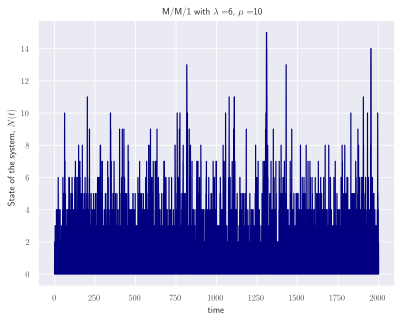

In [122]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
axes.set_title(f'M/M/1 with $\lambda =${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mm1_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations: 
1. The queue size does not grow without bounds when $\lambda < \mu$. 

- Distribution of Inter-Arrival times

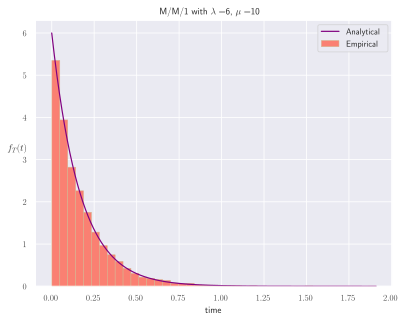

In [123]:
# Ideal PDF of Inter-arrival times :
t = np.linspace(0, np.max(arr_Times), 1000)
ideal_dist = arrival_rate * np.exp(-arrival_rate * t)

fig, axes = plt.subplots()
# Plot the ideal line
axes.plot(t, ideal_dist, color='purple', label='Analytical')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.set_title(f'M/M/1 with $\lambda =${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mm1_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations:
1. The analytical distribution matches the empirically plotted density histogram.
2. The distribution of interarrival times is exponential with rate $\lambda$.

- State Probabilities

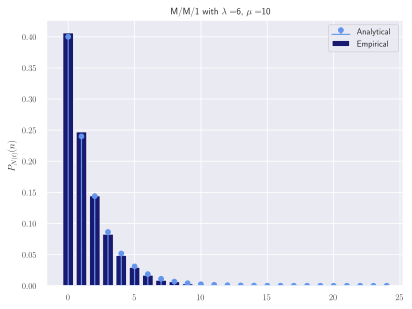

In [124]:
# Ideal PMF :: rho^n (1 - rho)
rho = arrival_rate / departure_rate
ideal_dist = []
for i in range(25):
    p_i = (rho ** i) * (1 - rho)
    ideal_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = np.sum(counts)

fig, axes = plt.subplots()
axes.stem(ideal_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Analytical')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(r'$P_{N(t)}(n)$')
axes.set_title(f'M/M/1 with $\lambda =${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mm1_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations:
1. For the most part, the fit of the PMF found analytically and that found bar plotting the empirical results match up.
2. The mismatch in some states is due to the stochastic (random) variability of the experiment.

- Average number of customers and Variance of number of customers

In [125]:
mean_empirical = np.mean(queue_history)
mean_analytical = rho / (1 - rho)

print(f'Expected mean value : {mean_analytical}\n -> Observed mean value : {mean_empirical}')

var_empirical = np.var(queue_history)
var_analytical = rho / ((1 - rho) ** 2)
print(f'Expected variance : {var_analytical}\n -> Observed variance : {var_empirical}')

Expected mean value : 1.4999999999999998
 -> Observed mean value : 1.4331935
Expected variance : 3.749999999999999
 -> Observed variance : 3.4705548915577507


- Little's Law:
    - The average number of customers in a queue is equal to the product of the arrival rate times the average time spent in the queue.
    - $\bar{N} = \lambda \bar{\tau}$

In [126]:
print(f'Average number of customers in the queue = {mean_empirical}')
print(f'Product = {arrival_rate * np.mean(ind_Times)}')

Average number of customers in the queue = 1.4331935
Product = 1.4517027095467185


Response time distribution

$\text{reponse time} (T) = \text{waiting time} + \text{service time}$

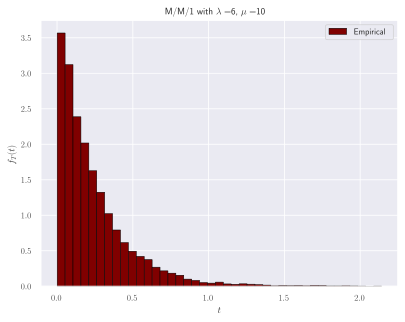

In [129]:
fig, axes = plt.subplots()
axes.hist(ind_Times, bins=41, edgecolor='black', linewidth=0.5, color='maroon', density=True, label='Empirical')
axes.set_xlabel(f'$t$')
axes.set_ylabel(f'$f_T(t)$')
axes.legend()
axes.set_title(f'M/M/1 with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mm1_response_time_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_response_time_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations:
1. Plotted the histogram of this quantity just out of interest and in search of new insights.

#### M/M/1/N - _Finite buffer case_ 

In [112]:
total_simul_time = 3000     # In common time units
arrival_rate = 10            # Number of arrivals per unit time
departure_rate = 10         # Number of departure per unit time
buffer_size = 10            # Buffer size of the queue
queue_history, arr_Times, dep_Times, ind_Times = qm.m_m_1_N_q(total_simul_time, del_t, arrival_rate, departure_rate, buffer_size)

In [113]:
np.max(queue_history)

10.0

- Evolution of the state of the system

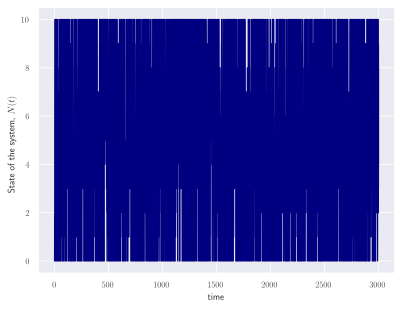

In [114]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
fig.savefig(f'simulation_results/mm1N_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1N_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Distribution of Inter-Arrival times

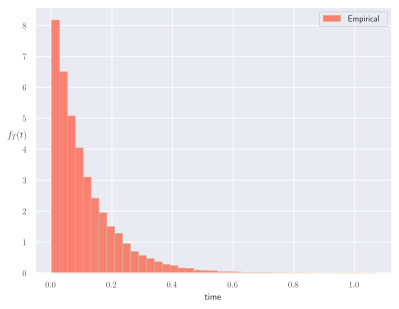

In [115]:
# Ideal PDF of Inter-arrival times :
t = np.linspace(0, max(arr_Times), 1000)
# ideal_dist = arrival_rate * np.exp(-arrival_rate * t)

fig, axes = plt.subplots()
# Plot the ideal line
# axes.plot(t, ideal_dist, color='purple', label='Ideal')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.legend()
fig.savefig(f'simulation_results/mm1N_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1N_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

- State Probabilities

In [116]:
# Ideal PMF :: rho^n (1 - rho)
rho = arrival_rate / departure_rate
ideal_dist = []
# for i in range(buffer_size):
#     p_i = (1 - rho) * (rho ** i) / (1 - (rho ** (buffer_size+1)))
#     ideal_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = sum(counts)

fig, axes = plt.subplots()
# axes.stem(ideal_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Ideal')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(r'$P_{N(t)}(n)$')
axes.legend()
fig.savefig(f'simulation_results/mm1N_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1N_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

TypeError: 'float' object is not callable

In [ ]:
arrival_rate, np.mean()

#### M/M/$\infty$ - Infinite server system

In [ ]:
total_simul_time = 1000     # In common time units
arrival_rate = 25            # Number of arrivals per unit time
departure_rate = 10         # Number of departure per unit time
queue_history, arr_Times, dep_Times, ind_Times = m_m_infinite_q(total_simul_time, arrival_rate, departure_rate)

- Evolution of the state of the system

In [ ]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
fig.savefig(f'simulation_results/mmInf_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Distribution of Inter-Arrival times

In [ ]:
# Ideal PDF of Inter-arrival times :
t = np.linspace(0, np.max(arr_Times), 1000)
ideal_dist = arrival_rate * np.exp(-arrival_rate * t)

fig, axes = plt.subplots()
# Plot the ideal line
axes.plot(t, ideal_dist, color='purple', label='Ideal')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.legend()
fig.savefig(f'simulation_results/mmInf_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

- State Probabilities

In [ ]:
# Ideal PMF :: rho^n (1 - rho)
rho = arrival_rate / departure_rate
ideal_dist = []
for i in range(25):
    p_i = (rho ** i) * np.exp(-rho) / factorial(i)
    ideal_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = sum(counts)

fig, axes = plt.subplots()
axes.stem(ideal_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Ideal')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(r'$P_{N(t)}(n)$')
axes.legend()
fig.savefig(f'simulation_results/mmInf_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Average number of customers and Variance of number of customers

In [ ]:
mean_empirical = np.mean(queue_history)
mean_analytical = rho 

print(f'Expected mean value : {mean_analytical}\n -> Observed mean value : {mean_empirical}')

var_empirical = np.var(queue_history)
var_analytical = rho 

print(f'Expected variance : {var_analytical}\n -> Observed variance : {var_empirical}')

#### M/M/m - Multiple but Finite Servers

In [ ]:
total_simul_time = 1000     # In common time units
arrival_rate = 18            # Number of arrivals per unit time
departure_rate = 22         # Number of departure per unit time
num_servers = 10 
queue_history, arr_Times, dep_Times, ind_Times = m_m_m_q(total_simul_time, arrival_rate, departure_rate, num_servers)

- Evolution of the state of the system

In [ ]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
fig.savefig(f'simulation_results/mmInf_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Distribution of Inter-Arrival times

In [ ]:
# Ideal PDF of Inter-arrival times :
t = np.linspace(0, np.max(arr_Times), 1000)
ideal_dist = arrival_rate * np.exp(-arrival_rate * t)

fig, axes = plt.subplots()
# Plot the ideal line
axes.plot(t, ideal_dist, color='purple', label='Ideal')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.legend()
fig.savefig(f'simulation_results/mmInf_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

- State Probabilities

In [ ]:
# Ideal PMF :: rho^n (1 - rho)
rho = arrival_rate / departure_rate
rho_prime = arrival_rate / (num_servers * departure_rate)
ideal_dist = []
p_0_inv = 1
for n in range(1, num_servers):
    p_0_inv += (1 / factorial(n)) * (rho ** n)
for n in range(num_servers, 2 ** 10):
    # Hopefully the sum will converge 
    p_0_inv += (1 / (num_servers ** (n - num_servers))) * (1 / factorial(num_servers)) * (rho ** n)

p_0 = 1 / p_0_inv

for n in range(num_servers):
    p_i = (1 / factorial(n)) * (rho ** n) * p_0
    ideal_dist.append(p_i)
for n in range(num_servers, 25):
    p_i = (1 / (num_servers ** (n - num_servers))) * (1 / factorial(num_servers)) * (rho ** n) * p_0
    ideal_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = sum(counts)

fig, axes = plt.subplots()
axes.stem(ideal_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Ideal')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(r'$P_{N(t)}(n)$')
axes.legend()
fig.savefig(f'simulation_results/mmInf_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Average number of customers and Variance of number of customers

In [ ]:
mean_empirical = np.mean(queue_history)
mean_analytical = rho 

print(f'Expected mean value : {mean_analytical}\n -> Observed mean value : {mean_empirical}')

var_empirical = np.var(queue_history)
var_analytical = rho 

print(f'Expected variance : {var_analytical}\n -> Observed variance : {var_empirical}')